In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/YBIGTA/0726 ML [DS]/과제

/content/drive/MyDrive/Colab Notebooks/YBIGTA/0726 ML [DS]/과제


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/YBIGTA/0726 ML [DS]/과제


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./movies_train.csv')
test = pd.read_csv('./movies_test.csv')

# 데이터 전처리

### 관찰

In [ ]:
# train, test 앞 뒤 5개 행 관찰
# test 데이터셋의 경우 box_off_num 정답 값이 빠져 있는 것을 확인할 수 있다.
# 적절한 모델을 결정하기 위해서 train 데이터로부터 validation 데이터를 만들어 여러 모델의 성능을 테스트 해보고, 가장 좋은 모델을 선택할 수 있다.
display(train)
display(test)
print(train.shape)
print(test.shape)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


(600, 12)
(243, 11)


1. movies_train.csv / movies_test.csv

    - title : 영화의 제목
    - distributor : 배급사
    - genre : 장르
    - release_time : 개봉일
    - time : 상영시간(분)
    - screening_rat : 상영등급
    - director : 감독이름
    - dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
    - dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
    - num_staff : 스텝수
    - num_actor : 주연배우수
    - box_off_num : 관객수

In [ ]:
# train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
# test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
test.shape

(243, 11)

### dir_prev_bfnum

train과 test 데이터셋에서 공통적으로 dir_prev_bfnum이라는 변수에서만 결측치가 관찰되었다.

이 변수는 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)로 감독의 이전 작품이 없는 경우도 이에 해당할 수 있다.

이 변수는 float type 변수로 숫자형이므로 적절한 전처리 과정을 거쳐 imputation을 진행하거나, null값이 아닌 값들의 분포를 살펴본 후에 수정이 가능하다.

[참고 사이트](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)

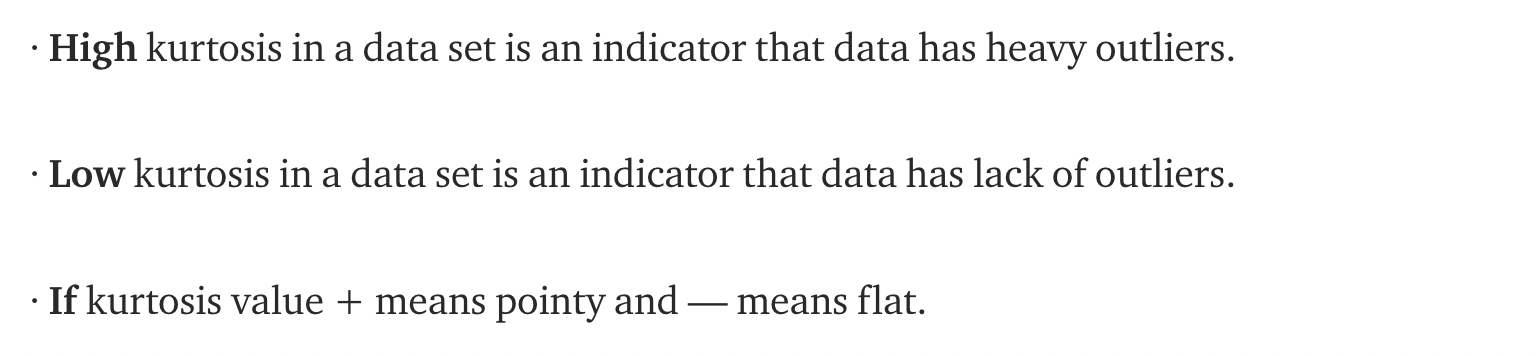

In [ ]:
# 해당 변수가 float type이므로 통계량들을 살펴볼 필요가 있다.
# Pandas의 Series 자료형은 describe()함수를 지원하지 않기 때문에 적절히 변환하여 나타내주자.
# train
bfnum_train_skew = pd.DataFrame(train.dir_prev_bfnum).describe().agg(["skew", "kurtosis"])
bfnum_train_dscr = pd.DataFrame(train.dir_prev_bfnum).describe()
display(pd.concat([bfnum_train_dscr, bfnum_train_skew]))
# test
bfnum_test_skew = pd.DataFrame(test.dir_prev_bfnum).describe().agg(["skew", "kurtosis"])
bfnum_test_dscr = pd.DataFrame(test.dir_prev_bfnum).describe()
display(pd.concat([bfnum_test_dscr, bfnum_test_skew]))

,dir_prev_bfnum
count,2.700000e+02
mean,1.050443e+06
std,1.791408e+06
min,1.000000e+00
25%,2.038000e+04
50%,4.784236e+05
75%,1.286569e+06
max,1.761531e+07
skew,2.759771e+00
kurtosis,7.704571e+00


,dir_prev_bfnum
count,1.070000e+02
mean,8.916695e+05
std,1.217341e+06
min,3.400000e+01
25%,6.250200e+04
50%,4.931200e+05
75%,1.080850e+06
max,6.173100e+06
skew,2.513104e+00
kurtosis,6.667242e+00


· If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

위 정보를 확인했을 때 Kurtosis가 크게 나타나는 `dir_prev_bfnum`은 현재 결측치를 제외한 값들이 주로 평균 근처에 모여 있거나 혹은 극단적인 outlier를 나타낼 수 있다는 것을 알 수 있다. 따라서 우선적으로 outlier로 판단되는 box plot의 1.5 IQR 범위 밖에 있는 값들의 경우는 해당 upper 혹은 lower bound가 되는 값으로 대체해주었다.
그럼 outlier를 제거한 값들은 대체로 평균을 근처에 분포할 것이라고 예상해 볼 수 있기 때문에 나머지 결측치들의 경우 결측치가 아닌 값들의 평균 값으로 대체해보았다.

위의 과정을 진행하기 이전 데이터가 너무 넓은 범위로 분포하고 왼쪽으로 쏠려 있는 분포를 보여 로그 변환을 취해주었다.

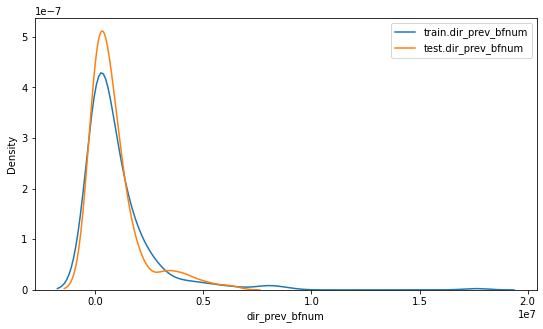

In [ ]:
# plotting
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train.dir_prev_bfnum, ax=ax)
sns.kdeplot(test.dir_prev_bfnum, ax=ax)
plt.legend(['train.dir_prev_bfnum', 'test.dir_prev_bfnum'])
plt.show()

전반적으로 $(최솟값) >= 1$ 인 상태에서 분포의 중심이 좌측으로 치우쳐 있음을 알 수 있다. Feature와 Target 간의 선형성을 고려하면 Log변환 혹은 sqrt변환을 통해 분포의 중심을 이동시키는 것이 바람직해 보이고, 기본적으로 로그가 sqrt보다는 이동하는 폭이 더 크기 때문에 min, max값의 차이가 큰 상황에서 로그변환을 해주었다. 특히 최솟값이 1이상이라는 점 때문에 원래 데이터에 +1을 하는 과정은 생략하였다.

In [ ]:
# 로그변환
train['dir_prev_bfnum'] = np.log(train.dir_prev_bfnum)
test['dir_prev_bfnum'] = np.log(test.dir_prev_bfnum)

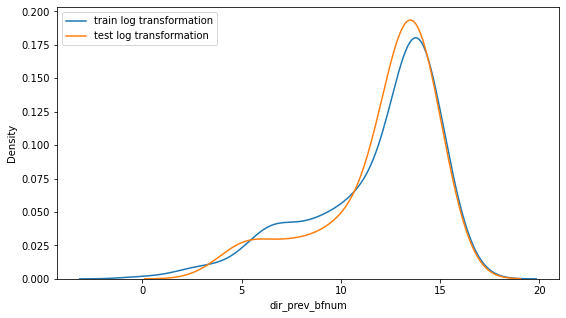

In [ ]:
# 변환의 결과 확인 (log변환)
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train.dir_prev_bfnum, ax=ax)
sns.kdeplot(test.dir_prev_bfnum, ax=ax)
plt.legend(['train log transformation', 'test log transformation'])
plt.show()

In [ ]:
# 실제 변화된 통계량도 확인해보자.
# train
n_bfnum_train_skew = pd.DataFrame(train.dir_prev_bfnum).describe().agg(["skew", "kurtosis"])
n_bfnum_train_dscr = pd.DataFrame(train.dir_prev_bfnum).describe()
display(pd.concat([n_bfnum_train_dscr, n_bfnum_train_skew]))
# test
n_bfnum_test_skew = pd.DataFrame(test.dir_prev_bfnum).describe().agg(["skew", "kurtosis"])
n_bfnum_test_dscr = pd.DataFrame(test.dir_prev_bfnum).describe()
display(pd.concat([n_bfnum_test_dscr, n_bfnum_test_skew]))

,dir_prev_bfnum
count,270.000000
mean,11.786092
std,3.234033
min,0.000000
25%,9.922309
50%,13.078232
75%,14.067479
max,16.684279
skew,2.807376
kurtosis,7.912111


,dir_prev_bfnum
count,107.000000
mean,12.037147
std,2.900068
min,3.526361
25%,11.026555
50%,13.108508
75%,13.893255
max,15.635712
skew,2.722598
kurtosis,7.569128


In [ ]:
# data의 IQR기준 Outlier 판단의 lower 혹은 upper bound 값 반환해주는 함수 정의
def getLowerUpperBounds(data, column): 
    # 4분위수 정의
    q1, q3 = np.nanpercentile(data[column], [25,75])
    # IQR
    iqr = q3 - q1
    # lower와 upper bound 값 구하기
    lower, upper = q1 - iqr * 1.5, q3 + iqr * 1.5
    return lower, upper

In [ ]:
# outlier 값들을 IQR로 대체하기
def outlier2bound(data, column, lower, upper):
  iter = data[column].tolist()
  # 값 대체하기
  for i in range(len(iter)):
    if iter[i] == np.nan:
      continue
    if iter[i] < lower:
      iter[i] = lower
    elif iter[i] > upper:
      iter[i] = upper
  iter = pd.Series(iter)
  return iter

In [ ]:
# upper_bound와 lower_bound 찾기
tr_bfnum_lo, tr_bfnum_up = getLowerUpperBounds(train, 'dir_prev_bfnum')
test_bfnum_lo, test_bfnum_up = getLowerUpperBounds(test, 'dir_prev_bfnum')

print(f'''train_lower_bound : {tr_bfnum_lo}
train_upper_bound : {tr_bfnum_up}
train_lower_bound : {test_bfnum_lo}
train_upper_bound : {test_bfnum_up}
''')

train_lower_bound : 3.7045548156327373
train_upper_bound : 20.285233458683347
train_lower_bound : 6.726504830502131
train_upper_bound : 18.19330537693933



기존에 min값으로 1이 존재하여 로그변환 결과로 min값 

$log(1) = 0$ 이 등장해야 하지만 lower_bound 처리에 의해 값이 조정되었음을 확인해볼 수 있다.

In [ ]:
train['dir_prev_bfnum'] = outlier2bound(train, 'dir_prev_bfnum', tr_bfnum_lo, tr_bfnum_up )
display(pd.DataFrame(train['dir_prev_bfnum']).describe())

,dir_prev_bfnum
count,270.000000
mean,11.821212
std,3.131899
min,3.704555
25%,9.922309
50%,13.078232
75%,14.067479
max,16.684279


In [ ]:
test['dir_prev_bfnum'] = outlier2bound(test, 'dir_prev_bfnum', test_bfnum_lo, test_bfnum_up )
display(pd.DataFrame(test['dir_prev_bfnum']).describe())

,dir_prev_bfnum
count,107.000000
mean,12.179241
std,2.564843
min,6.726505
25%,11.026555
50%,13.108508
75%,13.893255
max,15.635712


In [ ]:
# np.float64 nan을 lower,upper bound에 의해 조정된 범위의 평균값으로 대체
# kurtosis가 크므로 outlier가 없다면 평균 주변에 밀집해있을 것이라고 생각되어 평균으로 대체하는 것도 부자연스럽지 않다고 생각했다.
train.dir_prev_bfnum.fillna(train.dir_prev_bfnum.mean(), inplace=True)
test.dir_prev_bfnum.fillna(test.dir_prev_bfnum.mean(), inplace=True)
print(
f'''
train의 null값 : {train.dir_prev_bfnum.isnull().sum()}
test의 null값 : {test.dir_prev_bfnum.isnull().sum()}
'''
)


train의 null값 : 0
test의 null값 : 0



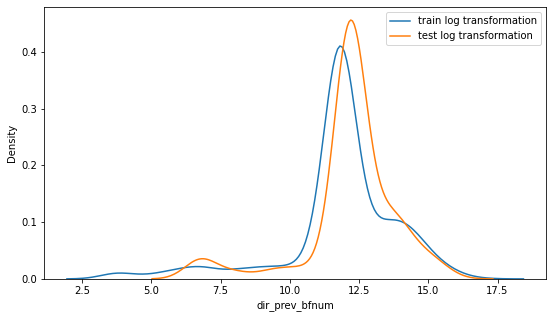

In [ ]:
# dir_prev_bfnum 변수에 대한 최종 결측치 처리 결과
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train.dir_prev_bfnum, ax=ax)
sns.kdeplot(test.dir_prev_bfnum, ax=ax)
plt.legend(['train log transformation', 'test log transformation'])
plt.show()

### dir_prev_bfnum drop version

In [ ]:
# # drop version
# train.drop(['dir_prev_bfnum'], axis=1, inplace=True)
# test.drop(['dir_prev_bfnum'], axis=1, inplace=True)
# display(train.head(2))
# display(test.head(2))

### 감독명

In [ ]:
# 이름은 같은 사람이 여러 작품을 만들지 않았다면 큰 의미가 없을 것이기에 얼마나 다양한지 정도만 파악해보려 한다.
print(
f"""
train['director'] : {train.director.nunique()}/{train.director.shape[0]} 명
test['director']  :{test.director.nunique()}/{test.director.shape[0]} 명
""")


train['director'] : 472/600 명
test['director']  :220/243 명



확인 결과 대부분이 다른 사람이고 일부 소수의 경우 이름이 중복되는 인원들도 있는 것으로 확인되었다. 하지만 이름의 경우 동명이인이 존재할 수 있는 고유값이 아니라는 점과 배급사 등과 결합하여 생각할 경우에도 예외적인 경우가 존재할 수 있기 때문에 drop해주었다.

In [ ]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

### 제목

In [ ]:
# 제목 : 제목 자체로 일부 이목을 끌 수는 있지만 일반적인 예측의 기준이 되기는 어렵다고 판단
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

### 배급사

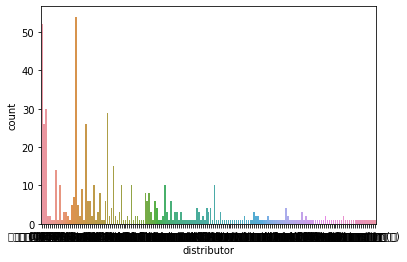

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(train.distributor)

In [ ]:
# 20회 이상 등장하는 배급사를 제외하면 거의 대부분 10회에도 미치지 못하는 규모이다.
train.distributor.value_counts().head(20)

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
시네마달         10
어뮤즈          10
(주)키노아이      10
시너지          10
인디플러그         9
NEW           8
인벤트 디         8
KT&G 상상마당     8
스폰지           7
무비꼴라쥬         6
Name: distributor, dtype: int64

배급한 횟수의 구간별 그룹에 따라 차등을 두려 한다.

CJ와 롯데엔터테인먼트를 1그룹

(주)NEW, (주)마운틴픽쳐스, (주)쇼박스, 인디스토리 가 2그룹

골든타이드픽처스, (주) 케이알씨지, (주) 영화사조제, 영화사 진진, 시네마달, 어뮤즈, (주)키노아이, 시너지 가 3그룹

나머지는 4그룹으로 설정하려고 한다.

배급사라는 변수의 경우 그래도 인지도 및 신뢰도와 관계되어 있기 때문에 빈도수가 높은 배급사일 수록 더 좋은 영화를 상영할 가능성이 크다고 판단하였다.

#### reliability 변수 생성

In [ ]:
# 각 그룹에 대한 가중치를 나타내는 변수를 rank로 새롭게 생성하였다.
distributor_list = train.distributor.value_counts()
# 등급 구간
class_1st = ['CJ 엔터테인먼트', '롯데엔터테인먼트']
class_2nd = ['(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스', '인디스토리']
class_3rd = ['골든타이드픽처스', '(주) 케이알씨지', '(주) 영화사조제', '영화사 진진',
             '시네마달', '어뮤즈', '(주)키노아이', '시너지']

# 배급사의 등급을 나누는 함수
def classifyDistributor(distributor):
    if distributor in class_1st:
        return 1
    elif distributor in class_2nd:
        return 2
    elif distributor in class_3rd:
        return 3
    else:
        return 4

# 신뢰도 reliability라는 변수를 추가로 생성
train['reliability'] = train['distributor'].apply(lambda x : classifyDistributor(x))
test['reliability'] = test['distributor'].apply(lambda x : classifyDistributor(x))

In [ ]:
test.shape

(243, 10)

#### distributor 값을 평균 관객수의 순서에 따라 숫자로 인코딩


In [ ]:
tmp = train.groupby('distributor').box_off_num.mean().reset_index(name = 'liked_distributor').sort_values(by = 'liked_distributor')
display(tmp)

,distributor,liked_distributor
141,인피니티엔터테인먼트,2.000000e+00
65,고구마공작소,8.000000e+00
92,사람과 사람들,4.200000e+01
131,위드시네마,4.600000e+01
68,나우콘텐츠,5.400000e+01
...,...,...
121,영구아트무비,2.541603e+06
96,쇼박스(주)미디어플렉스,2.634823e+06
27,(주)아이필름코퍼레이션,3.117859e+06
21,(주)쇼박스,3.386656e+06


In [ ]:
tmp['liked_distributor'] = [(169-i) for i in range(len(tmp))]
display(tmp)

,distributor,liked_distributor
141,인피니티엔터테인먼트,169
65,고구마공작소,168
92,사람과 사람들,167
131,위드시네마,166
68,나우콘텐츠,165
...,...,...
121,영구아트무비,5
96,쇼박스(주)미디어플렉스,4
27,(주)아이필름코퍼레이션,3
21,(주)쇼박스,2


In [ ]:
# liked_distributor 칼럼 추가하기
dist_lst = {}
for i, row in tmp.iterrows():
  dist_lst.update({row['distributor']:row['liked_distributor']})
# print(dist_lst) # dict
print(len(dist_lst)) # 169

169


In [ ]:
dist_keys = dist_lst.keys()
dist_keys = set(dist_keys)
print(dist_keys)

{'ysfilm', '(주)쇼박스', '마노엔터테인먼트', '쟈비스미디어', '퍼스트런', '(주)대명문화공장', 'CGV 무비꼴라쥬', '두 엔터테인먼트', '(주)씨엠닉스', '콘텐츠판다', '(주)아이필름코퍼레이션', '영구아트무비', '(주) 영화제작전원사', '씨네굿필름', '골든타이드픽처스', '(주)유비네트워크', '더픽쳐스/(주)마운틴픽쳐스', '프로젝트 엠피', '조이앤시네마', '어뮤즈', '(주)레인보우 팩토리', '주머니필름', '(주)노버스엔터테인먼트', '스크린조이', 'KT&G 상상마당', '시너지', '(주)NEW', '오퍼스픽쳐스', '조이앤컨텐츠그룹', '케이엠스타', 'CGV아트하우스', '쇼박스(주)미디어플렉스', '나우콘텐츠', '(주) 케이알씨지', '트리필름', '시네마달', '에이원 엔터테인먼트', '유니버설픽쳐스인터내셔널코리아', '와이드 릴리즈(주)', '씨너스엔터테인먼트(주)', '필름라인', '롯데엔터테인먼트', 'KBS미디어(주)', '찬란', '디마엔터테인먼트', '크리에이티브컴즈(주)', '보람엔터테인먼트', '(주)프레인글로벌', '더 피플', '스튜디오 느림보', '새인컴퍼니', '파이오니아21', '(주)JK필름', '(주)마운틴픽쳐스', '(주) 브릿지웍스', '리틀빅픽쳐스', 'CJ CGV', '디 씨드', '인디스토리', '영희야놀자', '드림팩트 엔터테인먼트', '제나두 엔터테인먼트', '(주)더픽쳐스', '(주)로드하우스', '노바엔터테인먼트', 'SK플래닛', '필라멘트 픽쳐스', 'CJ 엔터테인먼트', '마운틴 픽처스', '서울독립영화제', '싸이더스 FNH', '스폰지', '에스와이코마드', '스폰지이엔티', '(주)랠리버튼', '위더스필름', '(주)팝엔터테인먼트', '영화사 진진', '(주)팝 파트너스', '(주)고앤고 필름', '(주)패스파인더씨앤씨', '마법사필름', '스튜디오후크', '영화사 廊', '(주)에이원 엔터테인먼트', 'KT', '팜코리아미디어', '나이너스엔터테인먼

In [ ]:
# distributor는 문자열 값, liked_distributor값을 리턴해주는 함수
def sort_distributor(distributor):
    global dist_keys
    res = 0
    if distributor in dist_keys:
      res = dist_lst[distributor]
    return res

# 신뢰도 reliability라는 변수를 추가로 생성
train['distributor'] = train['distributor'].apply(lambda x : sort_distributor(x))
test['distributor'] = test['distributor'].apply(lambda x : sort_distributor(x))
display(train.head(50))
display(test.head())

,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,reliability
0,12,액션,2012-11-22,96,청소년 관람불가,11.821212,0,91,2,23398,1
1,2,느와르,2015-11-19,130,청소년 관람불가,13.965311,2,387,3,7072501,2
2,2,액션,2013-06-05,123,15세 관람가,12.304900,4,343,4,6959083,2
3,7,코미디,2012-07-12,101,전체 관람가,10.081383,2,20,6,217866,2
4,4,코미디,2010-11-04,108,15세 관람가,3.704555,1,251,2,483387,4
5,12,코미디,2012-10-25,113,15세 관람가,13.638736,2,262,4,233211,1
6,51,다큐멘터리,2013-05-23,104,전체 관람가,11.821212,0,32,5,53526,4
7,2,액션,2012-10-11,96,청소년 관람불가,13.513759,3,342,2,1110523,2
8,92,뮤지컬,2014-09-18,129,전체 관람가,11.821212,0,3,5,4778,4
9,134,드라마,2012-03-15,94,15세 관람가,11.821212,0,138,3,868,4


,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,reliability
0,17,느와르,2010-01-07,125,청소년 관람불가,12.613300,2,304,3,4
1,2,멜로/로맨스,2010-01-14,113,12세 관람가,12.744611,4,275,3,2
2,8,드라마,2010-01-28,115,12세 관람가,15.252168,3,419,7,1
3,2,액션,2010-02-04,116,15세 관람가,13.446390,2,408,2,2
4,8,공포,2010-02-18,110,15세 관람가,10.365270,1,380,1,1


#### distributor 삭제하고 reliability 남기기

### release_time(개봉일) 전처리

In [ ]:
# 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [ ]:
# 월 별로 영화의 box_office_num이 어떤 상관관계가 있었는지 plotting
tr_monthly_num = train.groupby('month').box_off_num.mean().reset_index(name = 'monthly_box_off_num').sort_values(by = 'monthly_box_off_num')
display(tr_monthly_num)

,month,monthly_box_off_num
3,4,2.581667e+05
2,3,2.738874e+05
9,10,3.859042e+05
10,11,4.956539e+05
5,6,5.122865e+05
4,5,5.756852e+05
1,2,6.630252e+05
8,9,7.315286e+05
7,8,1.029162e+06
6,7,1.113807e+06


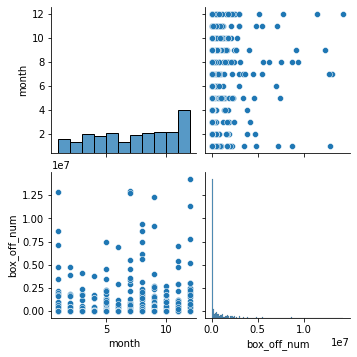

In [ ]:
# 월 별 관객수의 변화 추이가 있는 지 관찰
sns.pairplot(train, vars = ["month","box_off_num"])

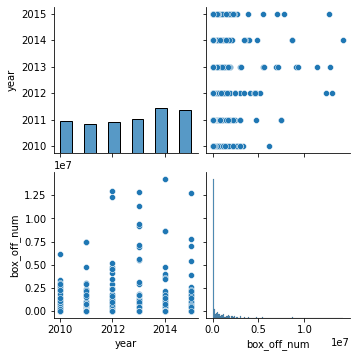

In [ ]:
# 연도 별 관객수의 변화 추이가 있는 지 관찰
sns.pairplot(train, vars = ["year","box_off_num"])

In [ ]:
# 연도에 따른 significant한 변화는 없다고 생각되어 year 칼럼 삭제
train.drop(['year'],axis = 1, inplace=True)
test.drop(['year'],axis = 1, inplace=True)

display(train)
display(test)

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,reliability,month
0,12,액션,96,청소년 관람불가,11.821212,0,91,2,23398,1,11
1,2,느와르,130,청소년 관람불가,13.965311,2,387,3,7072501,2,11
2,2,액션,123,15세 관람가,12.304900,4,343,4,6959083,2,6
3,7,코미디,101,전체 관람가,10.081383,2,20,6,217866,2,7
4,4,코미디,108,15세 관람가,3.704555,1,251,2,483387,4,11
...,...,...,...,...,...,...,...,...,...,...,...
595,7,드라마,111,청소년 관람불가,8.251403,1,510,7,1475091,2,8
596,2,드라마,127,15세 관람가,13.114454,1,286,6,1716438,2,3
597,50,공포,99,청소년 관람불가,11.821212,0,123,4,2475,2,9
598,8,느와르,102,15세 관람가,11.821212,0,431,4,2192525,1,5


,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,reliability,month
0,17,느와르,125,청소년 관람불가,12.613300,2,304,3,4,1
1,2,멜로/로맨스,113,12세 관람가,12.744611,4,275,3,2,1
2,8,드라마,115,12세 관람가,15.252168,3,419,7,1,1
3,2,액션,116,15세 관람가,13.446390,2,408,2,2,2
4,8,공포,110,15세 관람가,10.365270,1,380,1,1,2
...,...,...,...,...,...,...,...,...,...,...
238,0,드라마,78,15세 관람가,7.859413,1,4,4,4,11
239,89,다큐멘터리,86,12세 관람가,12.179241,0,18,2,2,10
240,0,느와르,107,청소년 관람불가,12.179241,0,224,4,4,10
241,0,드라마,102,청소년 관람불가,10.833661,1,68,7,4,10


In [ ]:
# 월 역시 마찬가지로 삭제
train.drop(['month'],axis = 1, inplace=True)
test.drop(['month'],axis = 1, inplace=True)

display(train)
display(test)

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,reliability
0,12,액션,96,청소년 관람불가,11.821212,0,91,2,23398,1
1,2,느와르,130,청소년 관람불가,13.965311,2,387,3,7072501,2
2,2,액션,123,15세 관람가,12.304900,4,343,4,6959083,2
3,7,코미디,101,전체 관람가,10.081383,2,20,6,217866,2
4,4,코미디,108,15세 관람가,3.704555,1,251,2,483387,4
...,...,...,...,...,...,...,...,...,...,...
595,7,드라마,111,청소년 관람불가,8.251403,1,510,7,1475091,2
596,2,드라마,127,15세 관람가,13.114454,1,286,6,1716438,2
597,50,공포,99,청소년 관람불가,11.821212,0,123,4,2475,2
598,8,느와르,102,15세 관람가,11.821212,0,431,4,2192525,1


,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,reliability
0,17,느와르,125,청소년 관람불가,12.613300,2,304,3,4
1,2,멜로/로맨스,113,12세 관람가,12.744611,4,275,3,2
2,8,드라마,115,12세 관람가,15.252168,3,419,7,1
3,2,액션,116,15세 관람가,13.446390,2,408,2,2
4,8,공포,110,15세 관람가,10.365270,1,380,1,1
...,...,...,...,...,...,...,...,...,...
238,0,드라마,78,15세 관람가,7.859413,1,4,4,4
239,89,다큐멘터리,86,12세 관람가,12.179241,0,18,2,2
240,0,느와르,107,청소년 관람불가,12.179241,0,224,4,4
241,0,드라마,102,청소년 관람불가,10.833661,1,68,7,4


박스오피스 순위는 따로 Seasonality를 보이지는 않는 것으로 나타났고, 연도와 월로 바꾸어준 후 그 영향력을 확인하고 삭제했다.

### screening_rat(상영등급)

In [ ]:
train.screening_rat.nunique()

4

In [ ]:
# screening_rat 변수의 값 영어로 바꾸기
def screening_rat_chngname(item):
  if item == "청소년 관람불가":
    return "Over_19"
  elif item == "15세 관람가":
    return "Over_15"
  elif item == "12세 관람가":
    return "Over_12"
  else:
    return "All"

train['screening_rat'] = train['screening_rat'].apply(lambda x : screening_rat_chngname(x))
test['screening_rat'] = test['screening_rat'].apply(lambda x : screening_rat_chngname(x))

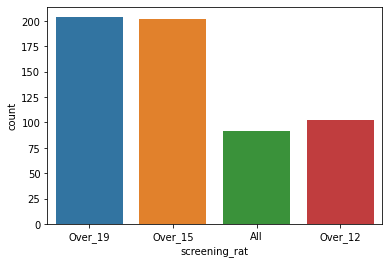

In [ ]:
# 데이터셋에 있는 영화의 개수 확인해보기
sns.countplot(train.screening_rat)

In [ ]:
tmp2 = train.groupby('screening_rat').box_off_num.mean().reset_index(name = 'screening_rat2box_off_num').sort_values(by = 'screening_rat2box_off_num')
display(tmp2)

,screening_rat,screening_rat2box_off_num
0,All,1.351005e+05
3,Over_19,3.641813e+05
1,Over_12,8.449809e+05
2,Over_15,1.247519e+06


In [ ]:
# Over_15, Over_12, Over_19, All 순으로 box_off_num의 평균이 높았음이 확인되었다.
# 이를 rank로 반영해보자.
tmp2['screening_rat2box_off_num'] = [(4-i) for i in range(len(tmp2))]
display(tmp2)

,screening_rat,screening_rat2box_off_num
0,All,4
3,Over_19,3
1,Over_12,2
2,Over_15,1


In [ ]:
# screening_rat2rank
def screening_rat2rank(item):
  if item == "Over_19":
    return 3
  elif item == "Over_15":
    return 1
  elif item == "Over_12":
    return 2
  else:
    return 4

train['screening_rat'] = train['screening_rat'].apply(lambda x : screening_rat2rank(x))
test['screening_rat'] = test['screening_rat'].apply(lambda x : screening_rat2rank(x))

In [ ]:
display(train)
display(test)

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,reliability
0,12,액션,96,3,11.821212,0,91,2,23398,1
1,2,느와르,130,3,13.965311,2,387,3,7072501,2
2,2,액션,123,1,12.304900,4,343,4,6959083,2
3,7,코미디,101,4,10.081383,2,20,6,217866,2
4,4,코미디,108,1,3.704555,1,251,2,483387,4
...,...,...,...,...,...,...,...,...,...,...
595,7,드라마,111,3,8.251403,1,510,7,1475091,2
596,2,드라마,127,1,13.114454,1,286,6,1716438,2
597,50,공포,99,3,11.821212,0,123,4,2475,2
598,8,느와르,102,1,11.821212,0,431,4,2192525,1


,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,reliability
0,17,느와르,125,3,12.613300,2,304,3,4
1,2,멜로/로맨스,113,2,12.744611,4,275,3,2
2,8,드라마,115,2,15.252168,3,419,7,1
3,2,액션,116,1,13.446390,2,408,2,2
4,8,공포,110,1,10.365270,1,380,1,1
...,...,...,...,...,...,...,...,...,...
238,0,드라마,78,1,7.859413,1,4,4,4
239,89,다큐멘터리,86,2,12.179241,0,18,2,2
240,0,느와르,107,3,12.179241,0,224,4,4
241,0,드라마,102,3,10.833661,1,68,7,4


### 장르
box_off_num이 높은 장르 순으로 정렬해보기

In [ ]:
tmp3 = train.groupby('genre').box_off_num.mean().reset_index(name = 'genre_rank').sort_values(by = 'genre_rank')
display(tmp3)

,genre,genre_rank
6,뮤지컬,6.627000e+03
3,다큐멘터리,6.717226e+04
8,서스펜스,8.261100e+04
9,애니메이션,1.819267e+05
5,멜로/로맨스,4.259680e+05
7,미스터리,5.275482e+05
1,공포,5.908325e+05
4,드라마,6.256898e+05
11,코미디,1.193914e+06
0,SF,1.788346e+06


In [ ]:
len(tmp3)

12

In [ ]:
# 1에 가까울 수록 인기가 높다.
tmp3['genre_rank'] = [(12-i) for i in range(len(tmp3))]
display(tmp3)

,genre,genre_rank
6,뮤지컬,12
3,다큐멘터리,11
8,서스펜스,10
9,애니메이션,9
5,멜로/로맨스,8
7,미스터리,7
1,공포,6
4,드라마,5
11,코미디,4
0,SF,3


In [ ]:
genre_lst = {}
for i, row in tmp3.iterrows():
  genre_lst.update({row['genre']:row['genre_rank']})

genre_keys = genre_lst.keys()
genre_keys = set(genre_keys)
print(genre_keys)

# genre는 문자열 값, genre_rank를 리턴해주는 함수
def get_genre_rank(genre):
    global genre_keys
    res = 0
    if genre in genre_keys:
      res = genre_lst[genre]
    return res

# 신뢰도 reliability라는 변수를 추가로 생성
train['genre'] = train['genre'].apply(lambda x : get_genre_rank(x))
test['genre'] = test['genre'].apply(lambda x : get_genre_rank(x))
display(train.head(50))
display(test.head())

{'액션', '뮤지컬', '다큐멘터리', '코미디', '공포', '멜로/로맨스', '애니메이션', 'SF', '드라마', '미스터리', '느와르', '서스펜스'}


,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,reliability
0,12,2,96,3,11.821212,0,91,2,23398,1
1,2,1,130,3,13.965311,2,387,3,7072501,2
2,2,2,123,1,12.304900,4,343,4,6959083,2
3,7,4,101,4,10.081383,2,20,6,217866,2
4,4,4,108,1,3.704555,1,251,2,483387,4
5,12,4,113,1,13.638736,2,262,4,233211,1
6,51,11,104,4,11.821212,0,32,5,53526,4
7,2,2,96,3,13.513759,3,342,2,1110523,2
8,92,12,129,4,11.821212,0,3,5,4778,4
9,134,5,94,1,11.821212,0,138,3,868,4


,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,reliability
0,17,1,125,3,12.613300,2,304,3,4
1,2,8,113,2,12.744611,4,275,3,2
2,8,5,115,2,15.252168,3,419,7,1
3,2,2,116,1,13.446390,2,408,2,2
4,8,6,110,1,10.365270,1,380,1,1


In [ ]:
train.shape

(600, 10)

In [ ]:
test.shape

(243, 9)

In [ ]:
# # 원핫 인코딩
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)

결과적으로 모든 Column이 숫자형의 데이터로 표현된 것을 확인할 수 있다.

이제 train을 feature부분의 x와 target 부분의 y로 나누어주자.

In [ ]:
# train_x, train_y 로 훈련 데이터의 target을 분리
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']
print(
    f'''
train_x.shape : {train_x.shape}, train_y.shape : {train_y.shape}
'''
)


train_x.shape : (600, 9), train_y.shape : (600,)



### Target변수 전처리 (train_y)

14262766 1


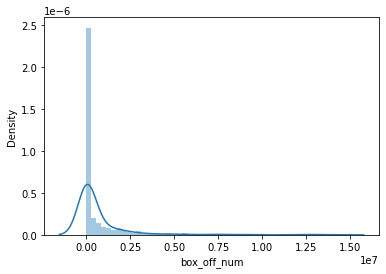

In [ ]:
# train_y의 분포를 관찰
print(max(train_y), min(train_y))
import seaborn as sns
sns.distplot(train_y)

In [ ]:
# 데이터의 분포가 굉장히 넓고 전반적으로 rightly skewed한 형태인 것을 확인할 수 있다.
df_y = train_y.copy(deep=True)
df_y = pd.DataFrame(df_y)
df_y.describe()

,box_off_num
count,6.000000e+02
mean,7.081818e+05
std,1.828006e+06
min,1.000000e+00
25%,1.297250e+03
50%,1.259100e+04
75%,4.798868e+05
max,1.426277e+07


In [ ]:
# log변환을 해주자.
# train_y는 numpy객체이므로 elementwise 연산이 이루어진다.
train_y = np.log(train_y+1)

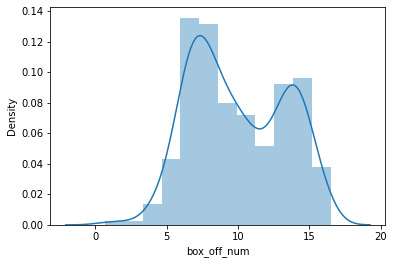

In [ ]:
# 다시 그래프를 그려보자
sns.distplot(train_y)

In [ ]:
# 모든 타겟 데이터가 0과 17 사이로 분포하는 것을 확인
print(max(train_y), min(train_y))

16.473162993397928 0.6931471805599453


# 모델 생성 및 예측(과제부분)

### 모델
- DecisionTreeRegressor --> GridSearch
- Ensemble

Leaderboard의 평가기준은 RMSE이므로 MSE를 통해 생성된 모델에 대한 평가를 하되,
$R^2$값도 성능에 대한 보조지표로 활용하였다.

In [ ]:
# train/validation split
# sklearn.model_selection의 train_test_split을 이용해 train/validation set으로 분할한다.
from sklearn.model_selection import train_test_split
# train : valid 비율을 7:3로 설정하여 feature와 target 데이터 분할
train_features, valid_features , train_target, valid_target = train_test_split(
    train_x, train_y, test_size = 0.3, random_state = 2022) # random_state 지정으로 결과 저장

print(
    f'''
train_features : {len(train_features)}
valid_features : {len(valid_features)}
train_target : {len(train_target)}
valid_target : {len(valid_target)}
'''
)


train_features : 420
valid_features : 180
train_target : 420
valid_target : 180



In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTRegressor = DecisionTreeRegressor()
# model fitting
DTRegressor.fit(train_features,train_target)
# train_x와 train_y fit한 DTRegressor로 test_x바탕 예측
pred_DT = DTRegressor.predict(valid_features)

In [ ]:
# pred를 MSE로 평가하기
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(valid_target,pred_DT):.3f}")
print(f"R-squared : {r2_score(valid_target,pred_DT):.3f}")

MSE : 4.816
R-squared : 0.590


In [ ]:
# GridSearch로 성능을 높여보자
from sklearn.model_selection import GridSearchCV
param_range1 = [1,2,3,4,5,6,7,8]
param_range2 = [10, 20, 30]
# 리더보드는 'mse' 기준이므로 'mse'를 바탕으로 한 그리드서치
param_range3 = ['mse'] # 'explained_variance' 등도 가능

param_grid = [{'max_depth': param_range1,
              'min_samples_leaf': param_range2,
              'criterion': param_range3}]

gs = GridSearchCV(estimator = DTRegressor,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=5,
                 n_jobs= -1)

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

2.728143514055314
{'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 10}


In [ ]:
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_features, train_target)

DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=10)

In [ ]:
# R squared가 증가했고, MSE 또한 감소하였다.
best_pred = best_tree.predict(valid_features)
print("DecisionTreeRegressor")
print('MSE: %.3f' % mean_squared_error(valid_target,best_pred))
print('R squared: %.3f' % r2_score(valid_target, best_pred))

DecisionTreeRegressor
MSE: 3.546
R squared: 0.698


In [ ]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
# 학습
model.fit(train_features, train_target)
# 예측
GradBoost_pred = model.predict(valid_features)
print("GradientBoostingRegressor")
print('MSE: %.3f' % mean_squared_error(valid_target,GradBoost_pred))
print('R squared: %.3f' % r2_score(valid_target, GradBoost_pred))

GradientBoostingRegressor
MSE: 2.549
R squared: 0.783


In [ ]:
# https://xgboost.readthedocs.io/en/stable/python/python_api.html
# XGBoosting
import xgboost as xgb
XGBRegressor = xgb.XGBRegressor(objective = 'reg:squarederror',
                                random_state=42)
# model fitting
XGBRegressor.fit(train_features, train_target)
# predict
XGBpred = XGBRegressor.predict(valid_features)
print("XGBoosting")
print('MSE: %.3f' % mean_squared_error(valid_target,XGBpred))
print('R squared: %.3f' % r2_score(valid_target, XGBpred))

XGBoosting
MSE: 2.502
R squared: 0.787


In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(random_state=42)
# model fitting
RFmodel.fit(train_features, train_target)
# predict
RFpred = RFmodel.predict(valid_features)
print("RandomForest")
print('MSE: %.3f' % mean_squared_error(valid_target,RFpred))
print('R squared: %.3f' % r2_score(valid_target, RFpred))

RandomForest
MSE: 2.608
R squared: 0.778


### 각 모델의 성능 정리 (종합)

DecisionTreeRegressor를 제외한 GB, XGB, RF에서 모두 비슷한 수준의 MSE와 $R^2$값이 등장하였고, 그 중 MSE가 가장 좋게 등장한 XGBoosting기법으로 예측을 해보려 한다.

최종 예측에서는 model을 fit할 때 train_x와 train_y가 사용되고,

test를 활용해 최종 예측치를 얻는다.

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test.shape)

(600, 9)
(600,)
(243, 9)


In [ ]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
# 학습
gb_model.fit(train_x, train_y)
# 예측
gb_pred = model.predict(test)

In [ ]:
# XGB boosting
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror')
# model fitting
xgb_model.fit(train_x, train_y)
# predict
xgb_pred = xgb_model.predict(test)

In [ ]:
# randomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
# model fitting
rf_model.fit(train_x, train_y)
# predict
rf_pred = rf_model.predict(test)

In [ ]:
print(
    f'''
gb_pred.shape : {gb_pred.shape}
xgb_pred.shape : {xgb_pred.shape}
rf_pred.shape : {rf_pred.shape}
'''
)


gb_pred.shape : (243,)
xgb_pred.shape : (243,)
rf_pred.shape : (243,)



각 예측치 모두 로그 변환을 거쳤던 변수였음을 잊으면 안된다 다시 처음의 지수 스케일로 변환해주자.

In [ ]:
predictions = [gb_pred, xgb_pred, rf_pred]

for i in range(len(predictions)):
  predictions[i] = np.exp(predictions[i]) - 1
  print(max(predictions[i])) # for test

8071215.990741855
5816947.0
7277636.689362163


In [ ]:
# 최종 pred
pred = sum(predictions)/3
print(pred.shape)

(243,)


In [ ]:
display(pred)

array([1.00276631e+06, 1.70585954e+06, 1.29924101e+06, 1.81925678e+06,
       7.74156652e+05, 1.97248909e+05, 2.61945666e+03, 2.27159928e+05,
       1.54552636e+05, 9.67575790e+05, 2.84596274e+05, 4.41083304e+05,
       9.73451408e+05, 2.87804940e+03, 5.34636455e+05, 1.56388787e+06,
       1.43125239e+03, 1.42803584e+06, 9.60573450e+04, 1.34828192e+05,
       4.42705476e+04, 1.67113516e+03, 1.20343671e+03, 5.40735086e+01,
       1.49617729e+05, 6.80886357e+05, 1.43028105e+03, 7.58800036e+05,
       5.60302339e+03, 1.99171735e+05, 7.97115345e+05, 7.70819245e+04,
       6.40524409e+03, 3.16233427e+03, 2.02337635e+03, 2.32637134e+03,
       1.37951131e+03, 3.30249093e+03, 2.05885515e+03, 4.57592003e+04,
       3.36881446e+05, 7.10167520e+04, 6.77269384e+05, 4.77913775e+05,
       1.14836690e+05, 9.48991177e+05, 2.81556289e+05, 1.58547097e+05,
       2.06216032e+05, 2.20522056e+02, 3.24274625e+03, 3.32922945e+05,
       2.45076761e+03, 1.31985270e+06, 1.42962086e+06, 3.48552197e+05,
      

# 제출

현재 실습파일상에서 데이터셋과 제출 파일이 위치한 파일을 pwd로 설정하였기 때문에, 제출파일은 상대경로 상 현재 디렉터리의 바로 아래 디렉터리에 있다. 제출파일을 열고 수정한 후 저장한다.

In [ ]:
submission = pd.read_csv('./submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
# 가장 예측 성능이 좋았던 XGBpred 값을 데이터로 저장해준다.
submission['box_off_num'] = pred
display(submission)

,title,box_off_num
0,용서는 없다,1.002766e+06
1,아빠가 여자를 좋아해,1.705860e+06
2,하모니,1.299241e+06
3,의형제,1.819257e+06
4,평행 이론,7.741567e+05
...,...,...
238,해에게서 소년에게,3.544874e+04
239,울보 권투부,2.254470e+03
240,어떤살인,6.343886e+05
241,말하지 못한 비밀,3.743998e+05


In [ ]:
submission

,title,box_off_num
0,용서는 없다,1.002766e+06
1,아빠가 여자를 좋아해,1.705860e+06
2,하모니,1.299241e+06
3,의형제,1.819257e+06
4,평행 이론,7.741567e+05
...,...,...
238,해에게서 소년에게,3.544874e+04
239,울보 권투부,2.254470e+03
240,어떤살인,6.343886e+05
241,말하지 못한 비밀,3.743998e+05


In [ ]:
submission.to_csv('./ml_assignment_final.csv',index = False)

# 제출 점수(과제부분)

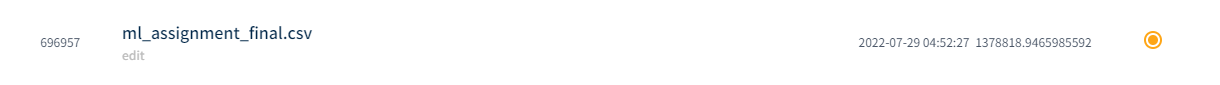